Estimated Average Pore Size (in pixels): 71.75


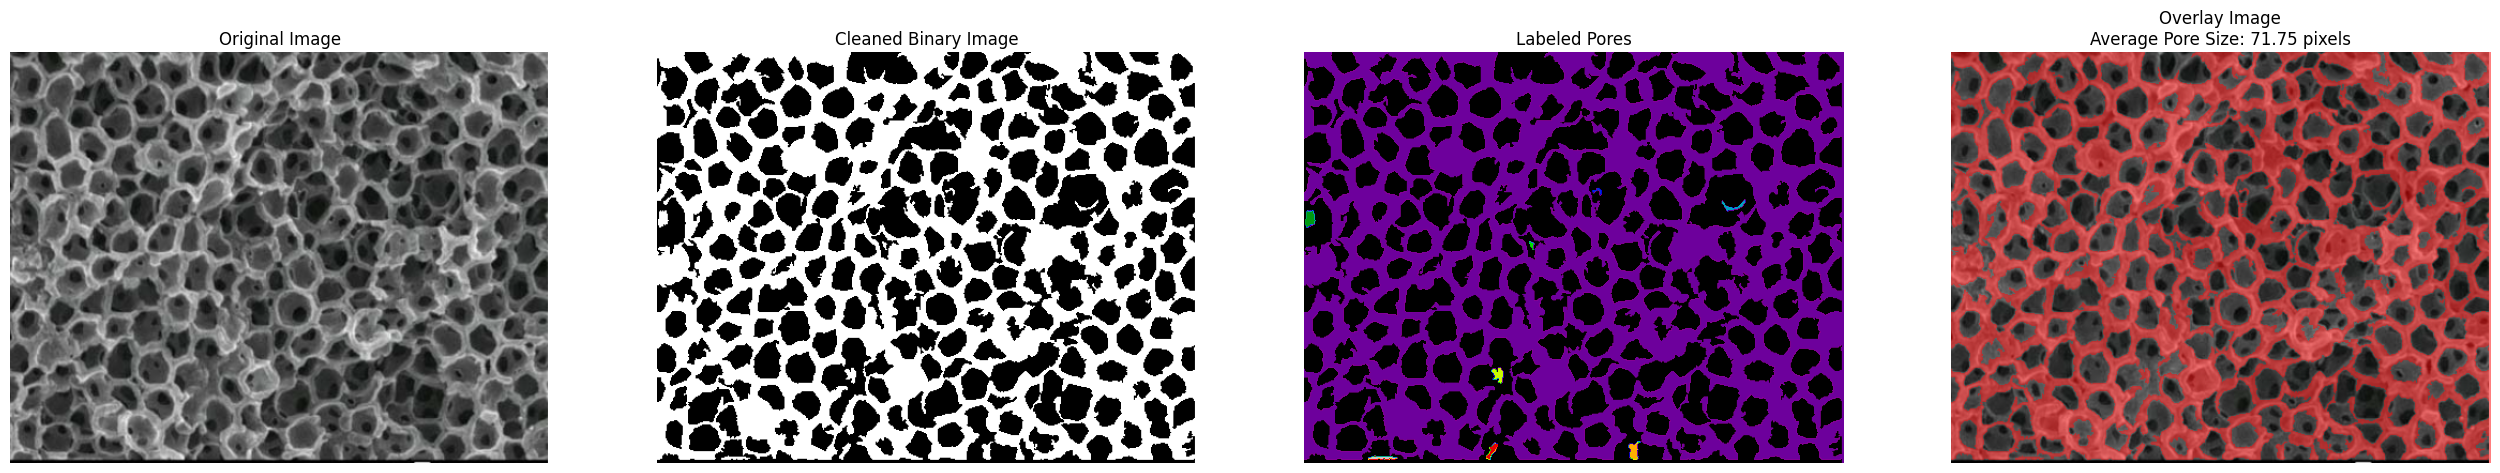

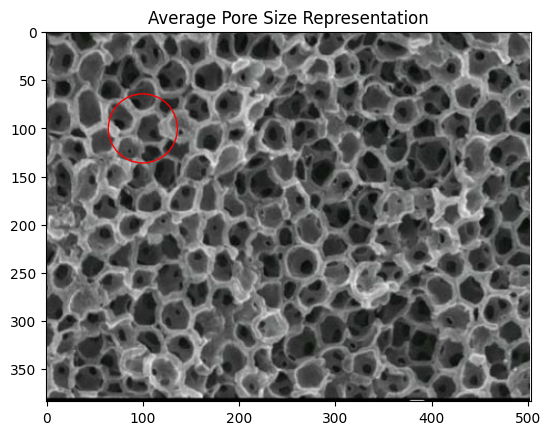

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, filters, exposure, measure, morphology

# Load the image
image_path = 'pr.png'
image = io.imread(image_path)[:, :, :3]  # Assuming RGB image

# Convert to grayscale
gray_image = color.rgb2gray(image)

# Enhance contrast using histogram equalization
equalized_image = exposure.equalize_adapthist(gray_image)

# Threshold the image to create a binary image
thresh = filters.threshold_otsu(equalized_image)
binary_image = equalized_image > thresh

# Remove small objects and fill holes to clean the binary image
cleaned_binary_image = morphology.remove_small_objects(binary_image, min_size=20)
cleaned_binary_image = morphology.remove_small_holes(cleaned_binary_image, area_threshold=100)

# Label the connected regions (pores)
labeled_image, num_features = measure.label(cleaned_binary_image, connectivity=2, return_num=True)

# Measure properties of labeled regions
properties = measure.regionprops(labeled_image)

# Filter out very small or very large objects that are not pores
min_size = 20
max_size = 500
pore_sizes = [prop.area for prop in properties if min_size < prop.area < max_size]

# Calculate average pore size
average_pore_size = np.mean(pore_sizes) if pore_sizes else 0

# Print the average pore size
print("Estimated Average Pore Size (in pixels):", average_pore_size)

# Create a red overlay where the binary image is True
overlay_image = image.copy()
overlay_image[cleaned_binary_image] = [255, 0, 0]  # Red color

# Use alpha blending to combine the original image and the overlay
alpha = 0.5
blended_image = image * (1 - alpha) + overlay_image * alpha
blended_image = blended_image.astype(np.uint8)

# Display the original, binary, labeled, and overlay images
fig, ax = plt.subplots(1, 4, figsize=(32, 8))
ax[0].imshow(image)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(cleaned_binary_image, cmap='gray')
ax[1].set_title('Cleaned Binary Image')
ax[1].axis('off')

ax[2].imshow(labeled_image, cmap='nipy_spectral')
ax[2].set_title('Labeled Pores')
ax[2].axis('off')

ax[3].imshow(blended_image)
ax[3].set_title('Overlay Image\nAverage Pore Size: {:.2f} pixels'.format(average_pore_size))
ax[3].axis('off')

plt.show()

# Example coordinates to draw a circle (adjust based on your image)
x, y = 100, 100  # Example coordinates

# Draw a circle at (x, y) with radius corresponding to the average pore size
fig, ax = plt.subplots()
ax.imshow(image)
circle = plt.Circle((x, y), average_pore_size / 2, color='red', fill=False)
ax.add_patch(circle)
plt.title('Average Pore Size Representation')
plt.show()
